# Midterm Assignment

This notebook contains our midterm assignment. In it, we will state our research question, identify, explore, and analyze our data sources, and visualize those results through charts and maps. 

## Research Question

Our research aims to find out if there is a correlation between the median income of a neighborhood and its number of permitted ADUs. Our hypothesis is that the permitting of ADUs will be negatively associated with neighborhood income because neighborhoods with more wealth will be more inclined to resist affordable housing options and maintain their exclusivity.

## Data Sources

We use two primary types of data sources to tackle this research question. The first type is permit data. This will allow us to determine the date and location of each permit pulled to pursue accessory dwelling unit developments. See the first link below for permit data from 2014 to 2020 for the city of Los Angeles. The second type of data source we will use is American Community Survey income data. The second link below shows income at the census tract level throughout Los Angeles County.

[https://data.lacity.org/City-Infrastructure-Service-Requests/Building-and-Safety-Permit-Information-Old/yv23-pmwf/data](https://data.lacity.org/City-Infrastructure-Service-Requests/Building-and-Safety-Permit-Information-Old/yv23-pmwf/data)

[https://censusreporter.org/data/table/?table=B19013&geo_ids=16000US0644000,140|16000US0644000&primary_geo_id=16000US0644000#](https://censusreporter.org/data/table/?table=B19013&geo_ids=16000US0644000,140|16000US0644000&primary_geo_id=16000US0644000#)

## Data Exploration

In this section, we will import and conduct some preliminary investigation of the two datasets.

### Permit Data Exploration

### Neighborhood Income Data Exploration

I start by importing the libraries I'll need as well as the geojson file. I run a quick .head(), .tail(), .shape, .info(), and plot the data to make sure everything looks right.

In [53]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

gdf = gpd.read_file('acs2019_5yr_B19013_14000US06037185320.geojson')
gdf.head(10)

,geoid,name,B19013001,"B19013001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."
5,14000US06037101400,"Census Tract 1014, Los Angeles, CA",75139.0,27397.0,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221..."
6,14000US06037102103,"Census Tract 1021.03, Los Angeles, CA",76833.0,8001.0,"MULTIPOLYGON (((-118.36533 34.22870, -118.3639..."
7,14000US06037102104,"Census Tract 1021.04, Los Angeles, CA",80789.0,19810.0,"MULTIPOLYGON (((-118.35620 34.21971, -118.3559..."
8,14000US06037102105,"Census Tract 1021.05, Los Angeles, CA",57614.0,24013.0,"MULTIPOLYGON (((-118.35307 34.20878, -118.3530..."
9,14000US06037102107,"Census Tract 1021.07, Los Angeles, CA",109375.0,16677.0,"MULTIPOLYGON (((-118.36789 34.23939, -118.3678..."


In [54]:
gdf.tail(10)

,geoid,name,B19013001,"B19013001, Error",geometry
995,14000US06037980020,"Census Tract 9800.20, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438..."
996,14000US06037980021,"Census Tract 9800.21, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017..."
997,14000US06037980022,"Census Tract 9800.22, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026..."
998,14000US06037980023,"Census Tract 9800.23, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480..."
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",150250.0,13582.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",62142.0,452.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [55]:
gdf = gdf.drop([1004])

In [56]:
gdf.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",150250.0,13582.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [57]:
gdf.shape

(1004, 5)

In [58]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [59]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1004 non-null   object  
 1   name              1004 non-null   object  
 2   B19013001         992 non-null    float64 
 3   B19013001, Error  989 non-null    float64 
 4   geometry          1004 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 47.1+ KB


In [60]:
gdf.sample(10)

,geoid,name,B19013001,"B19013001, Error",geometry
15,14000US06037104103,"Census Tract 1041.03, Los Angeles, CA",97543.0,40104.0,"MULTIPOLYGON (((-118.40085 34.28159, -118.4006..."
490,14000US06037199400,"Census Tract 1994, Los Angeles, CA",44637.0,9303.0,"MULTIPOLYGON (((-118.21481 34.07928, -118.2145..."
598,14000US06037212202,"Census Tract 2122.02, Los Angeles, CA",39229.0,6592.0,"MULTIPOLYGON (((-118.29163 34.05776, -118.2903..."
578,14000US06037211121,"Census Tract 2111.21, Los Angeles, CA",48846.0,10190.0,"MULTIPOLYGON (((-118.28681 34.07647, -118.2865..."
911,14000US06037273800,"Census Tract 2738, Los Angeles, CA",96750.0,10510.0,"MULTIPOLYGON (((-118.46233 33.98897, -118.4596..."
338,14000US06037141500,"Census Tract 1415, Los Angeles, CA",219698.0,58903.0,"MULTIPOLYGON (((-118.48841 34.14266, -118.4882..."
37,14000US06037106020,"Census Tract 1060.20, Los Angeles, CA",79703.0,19811.0,"MULTIPOLYGON (((-118.43983 34.31640, -118.4397..."
826,14000US06037261200,"Census Tract 2612, Los Angeles, CA",188424.0,34260.0,"MULTIPOLYGON (((-118.45944 34.13048, -118.4592..."
670,14000US06037221120,"Census Tract 2211.20, Los Angeles, CA",38060.0,6410.0,"MULTIPOLYGON (((-118.29159 34.04424, -118.2904..."
767,14000US06037237201,"Census Tract 2372.01, Los Angeles, CA",44911.0,12151.0,"MULTIPOLYGON (((-118.30240 33.98325, -118.3023..."


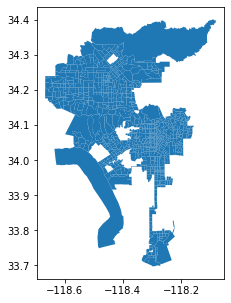

In [61]:
gdf.plot(figsize=(5, 5))

When I ran .tail(), I noticed that the final row included the entire City of Los Angeles, so I dropped it from the dataset. A .shape() command showed that we have about 1000 rows, which I know to be the approximate number of census tracts in the city. I was initially concerned when I saw lots of NANs in my .head() and .tail(). However, gdf.info() showed that 993 of the 1005 rows have data, and a .info() confirmed that. Finally, my plot looks correct.

In [62]:
gdf.columns = ['geoid','name','median income','error','geometry']
gdf.head()

,geoid,name,median income,error,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Lastly, I cleaned the column names so it's more apparent what we're looking at.

## Data Analysis and Map Visualization

In this section, we'll conduct data analysis on both the permit and income data (separately). We'll create charts and maps that show the spatial components of ADUs and median neighborhood income. We'll keep these separate for now - the next step after the midterm will be to assess the relationship between the two variables.

### Permit Analysis

### Neighborhood Income Analysis

First, I'd like to create a chart showing how many neighborhoods have various levels of median income to get a sense of the distribution. My guess is that there will be a lot of census tracts towards the lower end of the spectrum with some outliers towards the upper end of the spectrum.

In [69]:
px.bar(gdf,
      y='median income',
      title='Median Income by Neighborhood')

This didn't quite do what I wanted it to. It showed the median income for each neighborhood (each index value on the Y-axis). This gives me a nice snapshot of the incomes of each neighborhood, but it's more difficult to read than if the median incomes were grouped together. To accomplish this, I'll create a histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84567b9760>]],
      dtype=object)

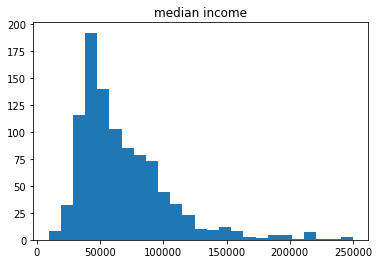

In [48]:
gdf.hist(column = 'median income',
        grid=False,
        bins = 25)

That's better. My prediction above about the income skew was correct. Now, to visualize the data, I'm going to plot it based on median income. I expect to see the high incomes in the Hollywood Hills and the low incomes in South LA, with a mix on incomes in the Valley.

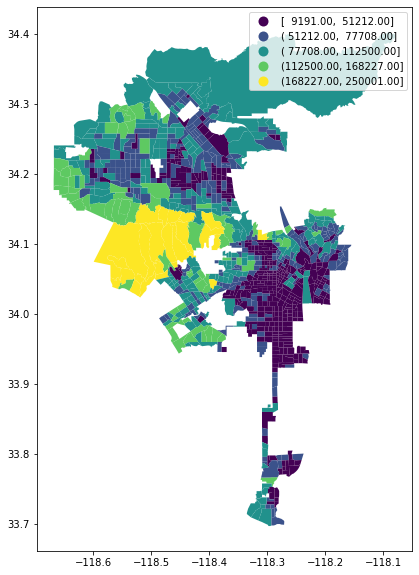

In [14]:
gdf.plot(figsize=(12,10),
    column = 'median income',
    legend = True,
    scheme = 'NaturalBreaks')

I was correct again, although it wasn't exactly difficult to predict. The last thing I'd like to do is add a basemap to the plot.

In [70]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

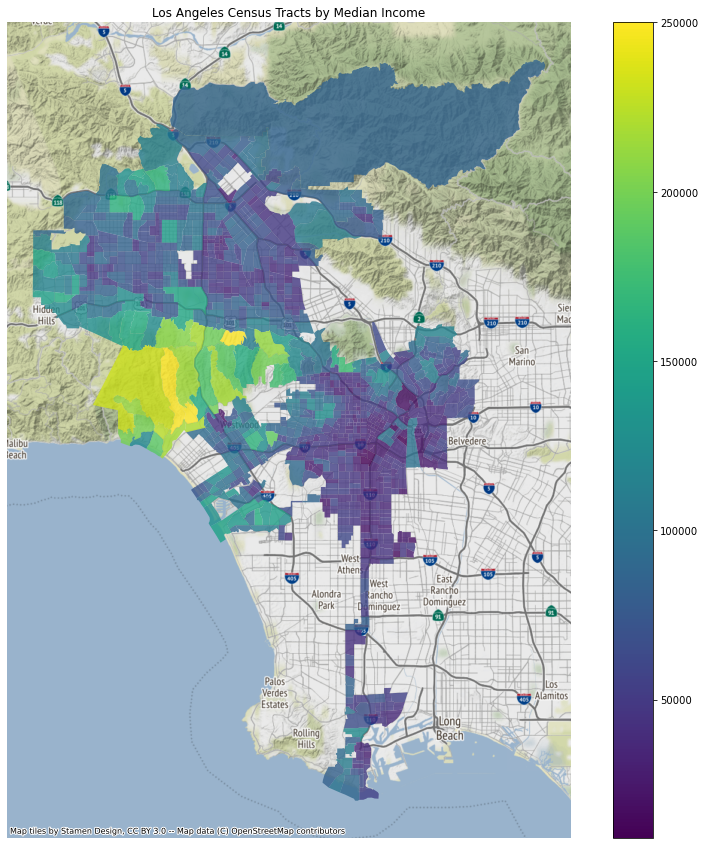

In [77]:
fig, ax = plt.subplots(figsize=(15,15))
gdf_web_mercator.plot(column='median income',
                      ax=ax, 
                      legend=True,
                      alpha=0.8)
ax.axis('off')
ax.set_title('Los Angeles Census Tracts by Median Income')
ctx.add_basemap(ax)

## Labor Division

As outlined in our proposal, we divided our labor based on dataset. So, Bryan conducted the data source identification, exploration, and analysis for the neighborhood income data and Nathan did the same for the ADU permitting data. As we move forward, we will work together to spatially join these datasets and conduct analysis on the relationship between them. 